In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('D:/Machine learing/actions.csv')
originalFeatures = data.columns
print('originalFeatures count ' ,len(originalFeatures))
print('originalFeatures ', originalFeatures)
print(data.head())




originalFeatures count  18
originalFeatures  Index(['Unnamed: 0', 'game_id', 'period_id', 'time_seconds', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y',
       'original_event_id', 'bodypart_id', 'type_id', 'result_id', 'action_id',
       'type_name', 'result_name', 'bodypart_name'],
      dtype='object')
   Unnamed: 0  game_id  period_id  time_seconds  team_id  player_id  start_x  \
0           0  2500089          1      2.763597     1659       9637    52.50   
1           1  2500089          1      4.761353     1659       8351    63.00   
2           2  2500089          1      5.533097     1659       9285    64.05   
3           3  2500089          1      7.707561     1659     239411    72.45   
4           4  2500089          1     11.614943     1659       9637    35.70   

   start_y  end_x  end_y  original_event_id  bodypart_id  type_id  result_id  \
0    34.00  63.00  30.60        251700146.0            0        0          1   
1    30.60  64.05  10.20   

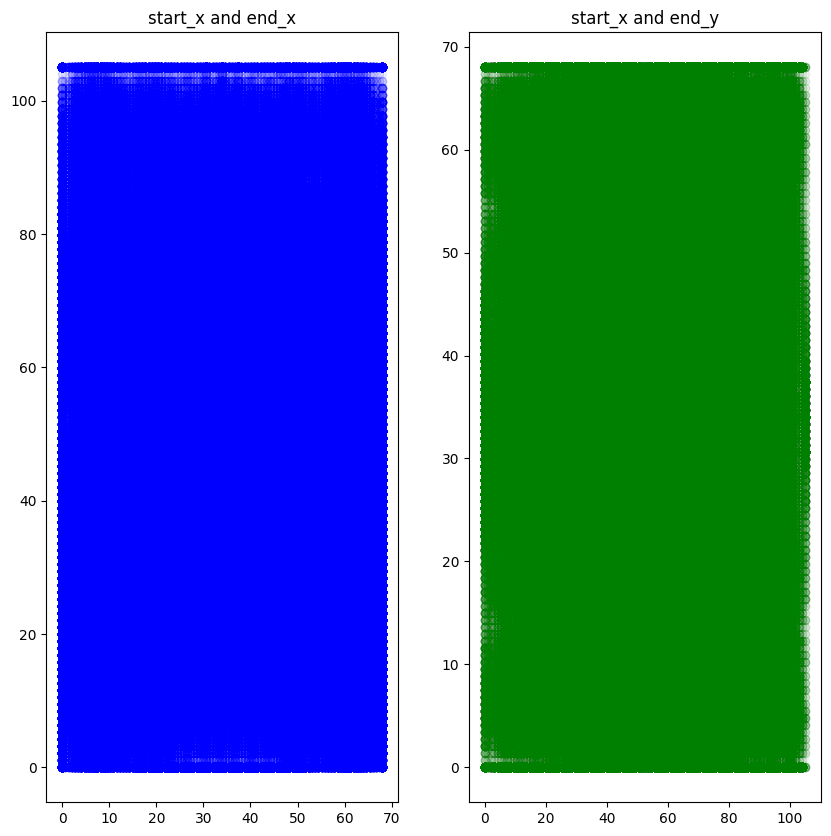

In [6]:
alpha = 0.02
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.scatter(data.start_y, data.end_x, color='blue', alpha=alpha)  # Removed the comma
plt.title('start_x and end_x')

plt.subplot(122)
plt.scatter(data.start_x, data.end_y, color='green', alpha=alpha)
plt.title('start_x and end_y')

plt.show() 

In [10]:
# Assuming data is your DataFrame
data['dist'] = np.sqrt(data['start_y']**2 + data['end_x']**2)

# Correcting the typo from 'starrt_x' to 'start_x'
start_x_zero = data['start_x'] == 0
data['angle'] = np.zeros(len(data))

# Calculate angle where start_x is not zero
data.loc[~start_x_zero, 'angle'] = np.arctan(data.loc[~start_x_zero, 'start_y'] / data.loc[~start_x_zero, 'start_x'])

# Handle the case where start_x is zero separately
data.loc[start_x_zero, 'angle'] = np.pi / 2